In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("IFND.csv", encoding='latin-1')
data.head()

,id,Statement,Image,Web,Category,Date,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,3,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,4,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,5,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,6,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE


# DATA PREPROCESSING 

In [3]:
data.shape

(56714, 7)

In [4]:
data  = data.sample(2500,random_state=0)

In [5]:
data.isna().sum()

id             0
Statement      0
Image          0
Web            0
Category       0
Date         496
Label          0
dtype: int64

## Removing punctuations from the text 

In [6]:
data['Statement']=data['Statement'].str.replace('[^\w\s]', '')
data.head()

,id,Statement,Image,Web,Category,Date,Label
17628,17630,Bihar polls 11 of 13 ministers leading 2 trailing,https://cmsimages.tribuneindia.com/gallary_con...,TRIBUNEINDIA,ELECTION,Nov-20,TRUE
55453,55455,Fact Check Video of a Christian Pastor trying ...,https://www.thestatesman.com/wp-content/upload...,AUGMENT,MISLEADING,NaN,Fake
54796,54798,Fact Check HereÕs the truth behind the video o...,https://englishtribuneimages.blob.core.windows...,AUGMENT,VIOLENCE,NaN,Fake
8807,8809,Navy selects 2 women officers for warship,https://cmsimages.tribuneindia.com/gallary_con...,TRIBUNEINDIA,COVID-19,Sep-20,TRUE
21534,21536,SC to hear today pleas seeking FIR against BJP...,https://www.thestatesman.com/wp-content/upload...,THESTATESMAN,VIOLENCE,Mar-20,TRUE


## Removing stopwords from text 

In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['Statement']=data['Statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
data.head()

,id,Statement,Image,Web,Category,Date,Label
17628,17630,Bihar polls 11 13 ministers leading 2 trailing,https://cmsimages.tribuneindia.com/gallary_con...,TRIBUNEINDIA,ELECTION,Nov-20,TRUE
55453,55455,Fact Check Video Christian Pastor trying stop ...,https://www.thestatesman.com/wp-content/upload...,AUGMENT,MISLEADING,NaN,Fake
54796,54798,Fact Check HereÕs truth behind video UP Police,https://englishtribuneimages.blob.core.windows...,AUGMENT,VIOLENCE,NaN,Fake
8807,8809,Navy selects 2 women officers warship,https://cmsimages.tribuneindia.com/gallary_con...,TRIBUNEINDIA,COVID-19,Sep-20,TRUE
21534,21536,SC hear today pleas seeking FIR BJP leaders ha...,https://www.thestatesman.com/wp-content/upload...,THESTATESMAN,VIOLENCE,Mar-20,TRUE


## Lemmatization

In [8]:
from nltk.stem import WordNetLemmatizer
l=WordNetLemmatizer()
data['Lemmatized_text']= data['Statement'].apply(lambda x: ' '.join([l.lemmatize(word) for word in x.split()]))
data.head()

,id,Statement,Image,Web,Category,Date,Label,Lemmatized_text
17628,17630,Bihar polls 11 13 ministers leading 2 trailing,https://cmsimages.tribuneindia.com/gallary_con...,TRIBUNEINDIA,ELECTION,Nov-20,TRUE,Bihar poll 11 13 minister leading 2 trailing
55453,55455,Fact Check Video Christian Pastor trying stop ...,https://www.thestatesman.com/wp-content/upload...,AUGMENT,MISLEADING,NaN,Fake,Fact Check Video Christian Pastor trying stop ...
54796,54798,Fact Check HereÕs truth behind video UP Police,https://englishtribuneimages.blob.core.windows...,AUGMENT,VIOLENCE,NaN,Fake,Fact Check HereÕs truth behind video UP Police
8807,8809,Navy selects 2 women officers warship,https://cmsimages.tribuneindia.com/gallary_con...,TRIBUNEINDIA,COVID-19,Sep-20,TRUE,Navy selects 2 woman officer warship
21534,21536,SC hear today pleas seeking FIR BJP leaders ha...,https://www.thestatesman.com/wp-content/upload...,THESTATESMAN,VIOLENCE,Mar-20,TRUE,SC hear today plea seeking FIR BJP leader hate...


## Removing unnecessary columns

In [9]:
data.drop(['id','Image','Web','Category','Date'],axis=1,inplace=True)
data.head()

,Statement,Label,Lemmatized_text
17628,Bihar polls 11 13 ministers leading 2 trailing,TRUE,Bihar poll 11 13 minister leading 2 trailing
55453,Fact Check Video Christian Pastor trying stop ...,Fake,Fact Check Video Christian Pastor trying stop ...
54796,Fact Check HereÕs truth behind video UP Police,Fake,Fact Check HereÕs truth behind video UP Police
8807,Navy selects 2 women officers warship,TRUE,Navy selects 2 woman officer warship
21534,SC hear today pleas seeking FIR BJP leaders ha...,TRUE,SC hear today plea seeking FIR BJP leader hate...


# EDA

## Word cloud for TRUE news 

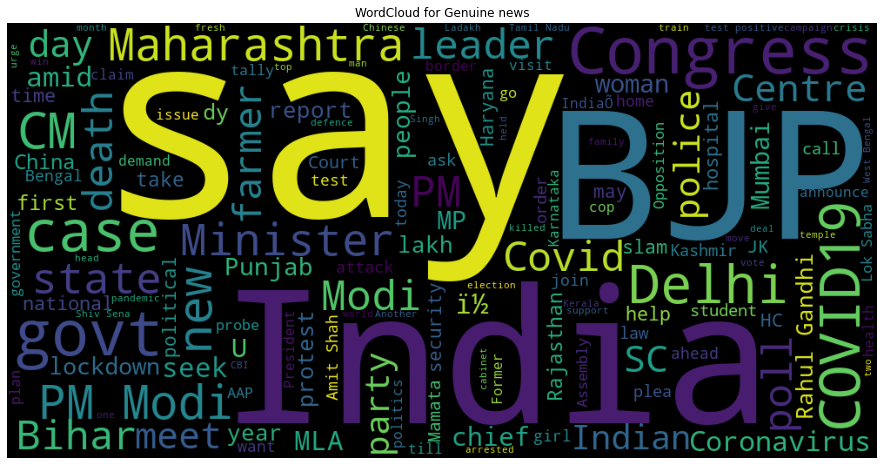

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='black')
True_wc = wc.generate(data[data['Label'] == 'TRUE']['Lemmatized_text'].str.cat(sep=' '))
plt.figure(figsize=(20,8))
plt.title("WordCloud for Genuine news")
plt.axis('off')
plt.imshow(True_wc)

## Word cloud for FAKE news

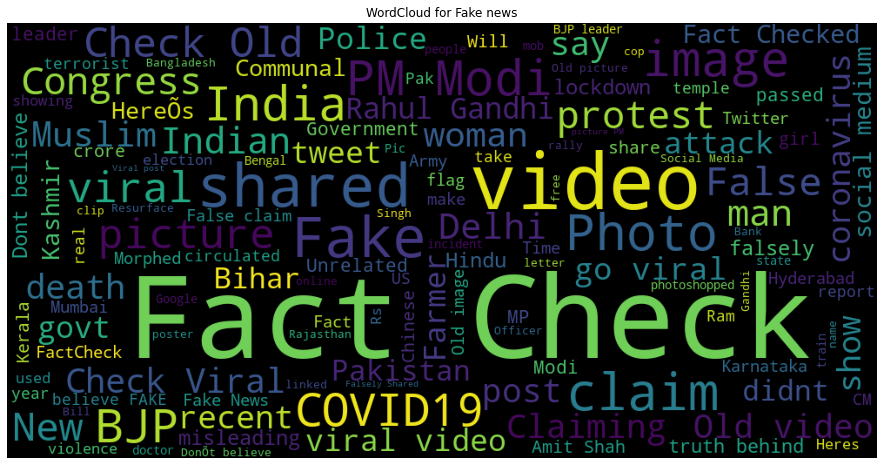

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(width=1000, height=500, min_font_size=10, background_color='black')
Fake_wc = wc.generate(data[data['Label'] == 'Fake']['Lemmatized_text'].str.cat(sep=' '))
plt.figure(figsize=(20,8))
plt.title("WordCloud for Fake news")
plt.axis('off')
plt.imshow(Fake_wc)

## Count plot

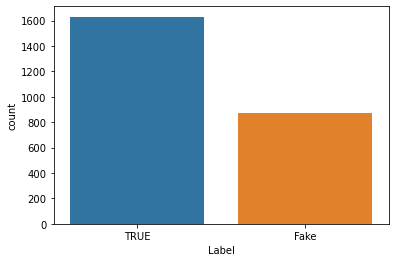

In [12]:
import seaborn as sns
sns.countplot(x ='Label', data = data)

### As evident from the above count plot , the dataset is balanced and this must be kept in mind while modelling

## Histogram for 50 most common words in TRUE news

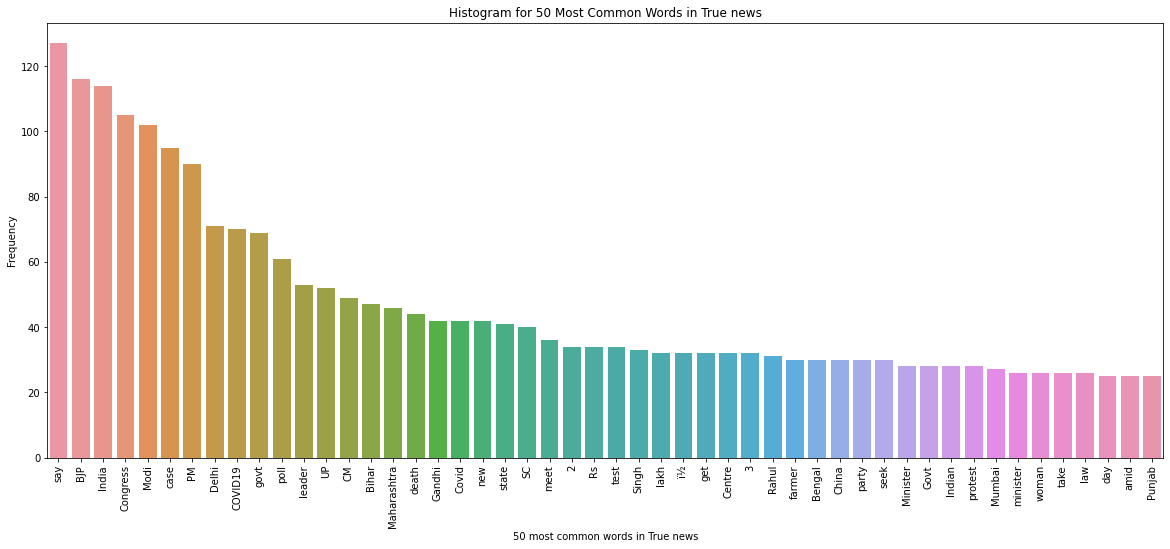

In [13]:
from collections import Counter
True_news = data[data['Label'] == 'TRUE']['Lemmatized_text'].values
True_words = " ".join(True_news).split()
True_word_counts = Counter(True_words)
common_True_words = True_word_counts.most_common(50)
plt.figure(figsize=(20,8))
sns.barplot(x=[word[0] for word in common_True_words], y=[word[1] for word in common_True_words] )
plt.xticks(rotation='vertical')
plt.xlabel('50 most common words in True news')
plt.ylabel('Frequency')
plt.title('Histogram for 50 Most Common Words in True news')
plt.show()

##  Histogram for 50 most common words in Fake news

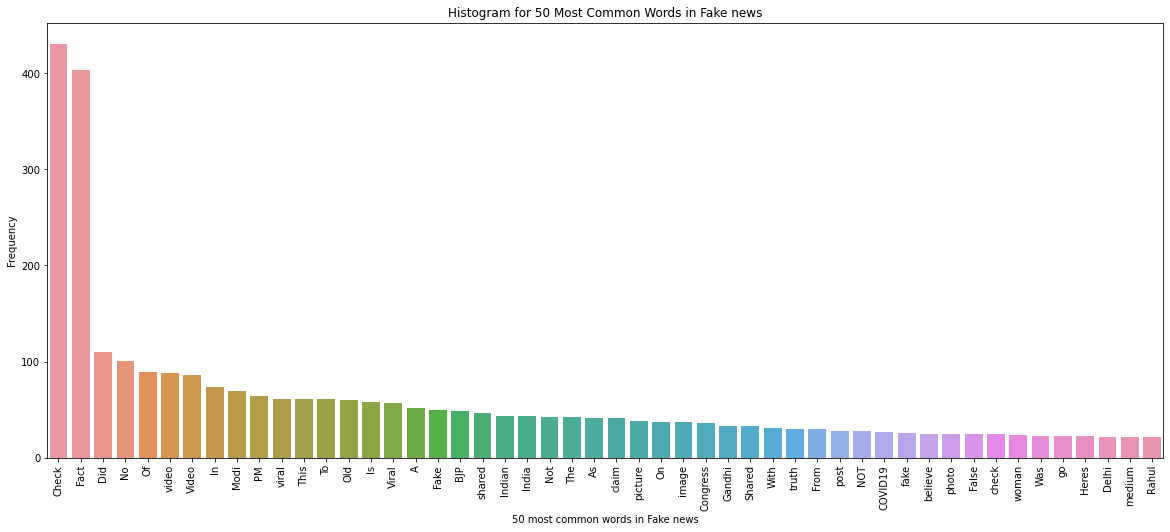

In [14]:
Fake_news = data[data['Label'] == 'Fake']['Lemmatized_text'].values
Fake_words = " ".join(Fake_news).split()
Fake_word_counts = Counter(Fake_words)
common_Fake_words = Fake_word_counts.most_common(50)
plt.figure(figsize=(20,8))
sns.barplot(x=[word[0] for word in common_Fake_words], y=[word[1] for word in common_Fake_words] )
plt.xticks(rotation='vertical')
plt.xlabel('50 most common words in Fake news')
plt.ylabel('Frequency')
plt.title('Histogram for 50 Most Common Words in Fake news')
plt.show()

# Encoding the target variable

In [15]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Label'] = lb.fit_transform(data['Label'])
data.head()

,Statement,Label,Lemmatized_text
17628,Bihar polls 11 13 ministers leading 2 trailing,1,Bihar poll 11 13 minister leading 2 trailing
55453,Fact Check Video Christian Pastor trying stop ...,0,Fact Check Video Christian Pastor trying stop ...
54796,Fact Check HereÕs truth behind video UP Police,0,Fact Check HereÕs truth behind video UP Police
8807,Navy selects 2 women officers warship,1,Navy selects 2 woman officer warship
21534,SC hear today pleas seeking FIR BJP leaders ha...,1,SC hear today plea seeking FIR BJP leader hate...


## TF-IDF Vectorization 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
X=data['Lemmatized_text']
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# MODELLING 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
y=data['Label']
x_train,x_test, y_train, y_test = train_test_split(X_tfidf,y,test_size=0.3,random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)
print(Accuracy*100)

87.2


In [18]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(random_state=0)
X_resampled, y_resampled = us.fit_resample(X_tfidf,y)
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(X_resampled, y_resampled,test_size=0.3,random_state=42)

In [19]:
logreg.fit(x_train_r, y_train_r)
Accuracy = logreg.score(x_test_r, y_test_r)
print(Accuracy*100)

90.99616858237547


In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_r,y_train_r)
Accuracy = dt.score(x_test_r, y_test_r)
print(Accuracy*100)

89.08045977011494


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM,Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [22]:
mlp = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_r.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [23]:
mlp.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
mlp.fit(x_train_r.toarray(),y_train_r,
        epochs=21, 
        batch_size=64, )

Epoch 1/21
19/19 [==============================] - 1s 15ms/step - loss: 0.6805 - accuracy: 0.7410
Epoch 2/21
19/19 [==============================] - 0s 15ms/step - loss: 0.5386 - accuracy: 0.9671
Epoch 3/21
19/19 [==============================] - 0s 15ms/step - loss: 0.2532 - accuracy: 0.9836
Epoch 4/21
19/19 [==============================] - 0s 15ms/step - loss: 0.0719 - accuracy: 0.9942
Epoch 5/21
19/19 [==============================] - 0s 16ms/step - loss: 0.0228 - accuracy: 0.9992
Epoch 6/21
19/19 [==============================] - 0s 16ms/step - loss: 0.0120 - accuracy: 0.9984
Epoch 7/21
19/19 [==============================] - 0s 15ms/step - loss: 0.0067 - accuracy: 0.9992
Epoch 8/21
19/19 [==============================] - 0s 15ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 9/21
19/19 [==============================] - 0s 15ms/step - loss: 0.0046 - accuracy: 0.9992
Epoch 10/21
19/19 [==============================] - 0s 15ms/step - loss: 0.0035 - accuracy: 0.9992
Epoch 11/

In [25]:
loss,accuracy = mlp.evaluate(x_test_r.toarray(),y_test_r)
print(accuracy)

17/17 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.9080
0.9080459475517273
